<table align="left" width=100%>
    <tr>
        <td width="12%">
                <img src="../../../../images/RA_Logo.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b>playground-series-s3e1 - California Housing Prediction </b>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/vidyadharbendre/learn_machine_learning/blob/main/regression/jupyter_notebooks/02_kaggle/playseries/playfulseries_pred_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/vidyadharbendre/learn_machine_learning/blob/main/regression/jupyter_notebooks/02_kaggle/playseries/playfulseries_pred_model.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [9]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

In [10]:
!pwd

/Users/vidyadharbendre/workspace/learn_machine_learning/regression/jupyter_notebooks/02_kaggle/playseries


In [13]:
df = pd.read_csv('../../../../regression/data/kaggle/playground_series/train.csv')

In [14]:
#1_1. shape This is to know the number of rows and columns - shape of the data
df.shape

(37137, 10)

In [15]:
#1_2. df.info(). This is know the number of non-null entries, # of columns, datatypes & memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


This output provides you with an overview of the DataFrame, such as the number of rows and columns, the column 
names, the data types, and memory usage. 
It's a handy tool for quickly understanding the structure of your dataset and identifying any missing values or
potential data type issues.

In [16]:
#1_3 df.head() - This is used to display the first five records.
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.385900,15.000000,3.827160,1.112100,1280.000000,2.486989,34.600000,-120.120000,0.980000
1,1,3.718800,17.000000,6.013373,1.054217,1504.000000,3.813084,38.690000,-121.220000,0.946000
2,2,4.775000,27.000000,6.535604,1.103175,1061.000000,2.464602,34.710000,-120.450000,1.576000
3,3,2.413800,16.000000,3.350203,0.965432,1255.000000,2.089286,32.660000,-117.090000,1.336000
4,4,3.750000,52.000000,4.284404,1.069246,1793.000000,1.604790,37.800000,-122.410000,4.500000


In [17]:
#1_4. df.head().transpose()

df.head().transpose()

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000000,4.000000
MedInc,2.385900,3.718800,4.775000,2.413800,3.750000
HouseAge,15.000000,17.000000,27.000000,16.000000,52.000000
AveRooms,3.827160,6.013373,6.535604,3.350203,4.284404
AveBedrms,1.112100,1.054217,1.103175,0.965432,1.069246
Population,1280.000000,1504.000000,1061.000000,1255.000000,1793.000000
AveOccup,2.486989,3.813084,2.464602,2.089286,1.604790
Latitude,34.600000,38.690000,34.710000,32.660000,37.800000
Longitude,-120.120000,-121.220000,-120.450000,-117.090000,-122.410000
MedHouseVal,0.980000,0.946000,1.576000,1.336000,4.500000


In this above example, df.head() is applied to the DataFrame first, showing the first 5 rows. 
Then, df.transpose() is applied to the result, swapping the rows and columns of those 5 rows. 
This can be useful when you want to examine the initial data points across columns more closely.

In [18]:
#1_5 df.tail - displays the bottom 5 rows
df.tail()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
37132,37132,3.343800,50.000000,4.936508,1.079365,1775.000000,3.022222,34.190000,-118.360000,1.856000
37133,37133,3.730800,26.000000,5.087533,0.966019,1006.000000,4.316901,37.320000,-121.860000,1.588000
37134,37134,4.171600,52.000000,4.678862,1.101485,1156.000000,1.431734,37.750000,-122.440000,3.387000
37135,37135,2.714300,16.000000,5.710074,1.068376,584.000000,2.803659,38.400000,-120.980000,1.592000
37136,37136,2.241900,34.000000,5.424419,1.058685,1340.000000,3.799065,36.340000,-119.640000,0.652000


We can adjust the number of rows displayed by passing the desired number as an argument to df.tail(). 
For example, df.tail(10) would show the last 10 rows of the DataFrame, and 
df.tail(1) would display only the very last row.

This summary is helpful for understanding the central tendency, spread, and distribution of the numeric data in
the DataFrame. 
It provides insights into the dataset's characteristics, which can be useful for data analysis and exploration.

In [19]:
#2_1.Type Casting (astype) 

In [20]:
#3 - Missing Value Treatment

In [21]:
#3_1 -  use isnull() to check for missing values
# sum(): gives the sum of missing values in each column
missing_values = df.isnull().sum()

# print the missing values
missing_values

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [22]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
id,0,0.000000,int64
MedInc,0,0.000000,float64
HouseAge,0,0.000000,float64
AveRooms,0,0.000000,float64
AveBedrms,0,0.000000,float64
Population,0,0.000000,float64
AveOccup,0,0.000000,float64
Latitude,0,0.000000,float64
Longitude,0,0.000000,float64
MedHouseVal,0,0.000000,float64


In [23]:
df = df.drop(columns='id')

In [24]:
#4_1_1. Five point summary - df.describe()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


This summary is helpful for understanding the central tendency, spread, and distribution of the numeric data in the DataFrame. It provides insights into the dataset's characteristics, which can be useful for data analysis and exploration.

In [25]:
#4_1_2. Five point summary for categorical columns - /include = object for categorical - Five Point Summary
#df.describe(include=object)

In [26]:
#4_1_2. Five point summary for categorical columns
#df.describe(exclude=np.number)

In [27]:
# check the categories of the variable 'mainroad' 
#print('Categories in mainroad:', df.mainroad.unique())

In [28]:
#df.mainroad.value_counts()

In [29]:
# check the categories of the variable 'guestroom' 
#print('Categories in guestroom:', df.guestroom.unique())

In [30]:
# calculate the variance
var = df.var(numeric_only=True)

# rounding off the values upto 3 decimals
round(var, 6)

MedInc              3.251412
HouseAge          147.822337
AveRooms            1.455020
AveBedrms           0.009310
Population    1696427.078672
AveOccup            7.303035
Latitude            4.339633
Longitude           3.896787
MedHouseVal         1.342286
dtype: float64

The variance indicates how much is the data varying from the mean. 
The output suggests that the variable bathrooms has the least variance and the variable price has the maximum variance.

In [31]:
df.std(numeric_only=True)

MedInc           1.803167
HouseAge        12.158221
AveRooms         1.206242
AveBedrms        0.096490
Population    1302.469608
AveOccup         2.702413
Latitude         2.083179
Longitude        1.974028
MedHouseVal      1.158571
dtype: float64

Interpretation: We can see that the variable 'bathrooms' has a standard deviation near to zero. 
It indicates that there is not much variability. 
Thus this variable does not add much value to the analysis and can be further removed from the study.
However, it is not sensible to compare variation in variables having different units because they vary in their respective units and the means about which they occur.

In [32]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)

In [33]:
df_num.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

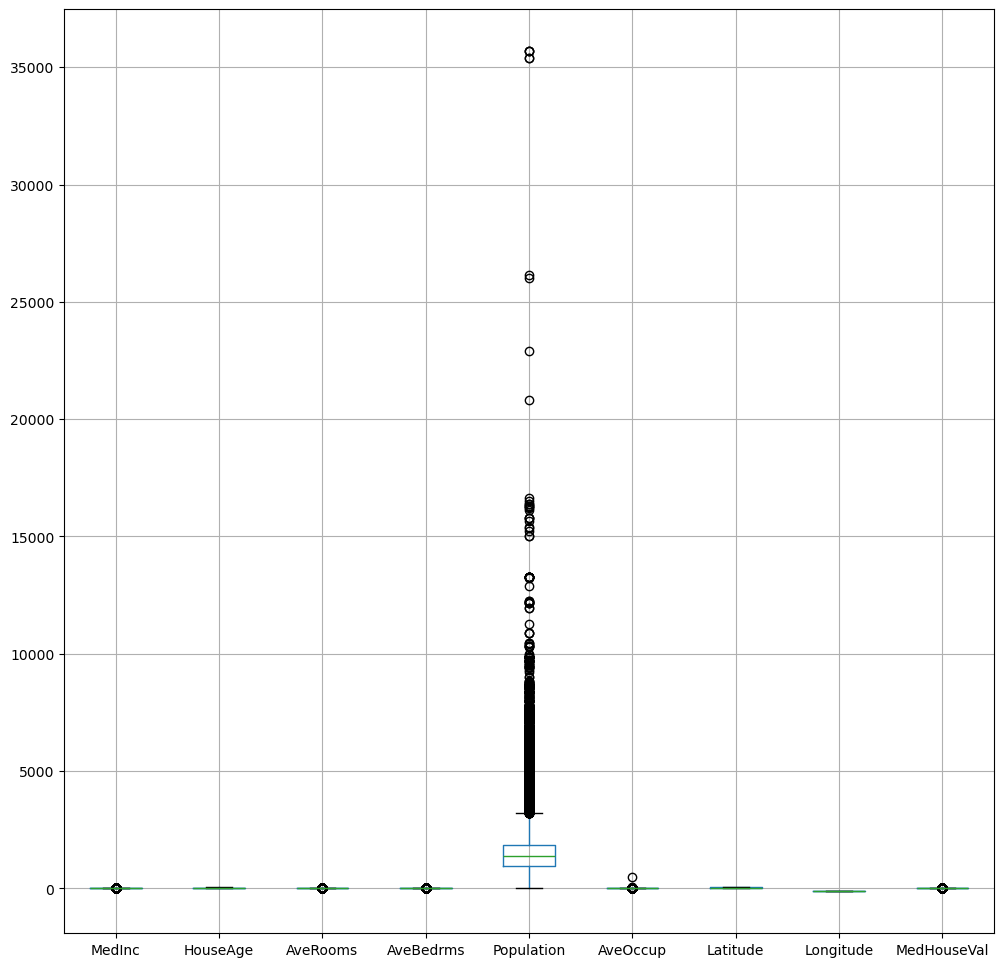

In [34]:
plt.figure(figsize=(12, 12))
df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']].boxplot()
plt.show()

In [35]:
df_num.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

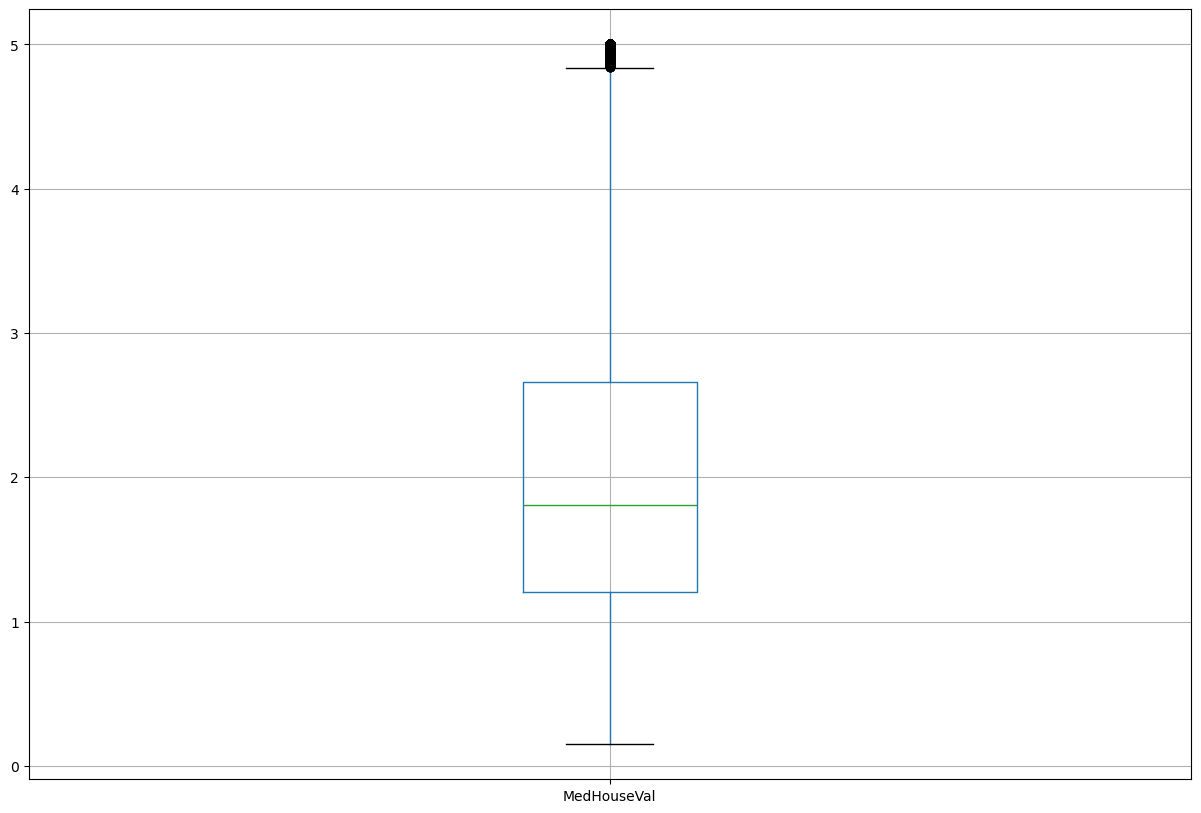

In [36]:
df_num.boxplot(column='MedHouseVal')
plt.show()

In [37]:
# filter the categorical variables from the data
# df_cat = df.select_dtypes(exclude = np.number)
# df_cat.columns

In [38]:
# find the range
print(df_num.quantile(0.75)-df_num.quantile(0.25))

MedInc          2.097400
HouseAge       18.000000
AveRooms        1.501075
AveBedrms       0.068521
Population    904.000000
AveOccup        0.730818
Latitude        3.770000
Longitude       3.780000
MedHouseVal     1.452000
dtype: float64


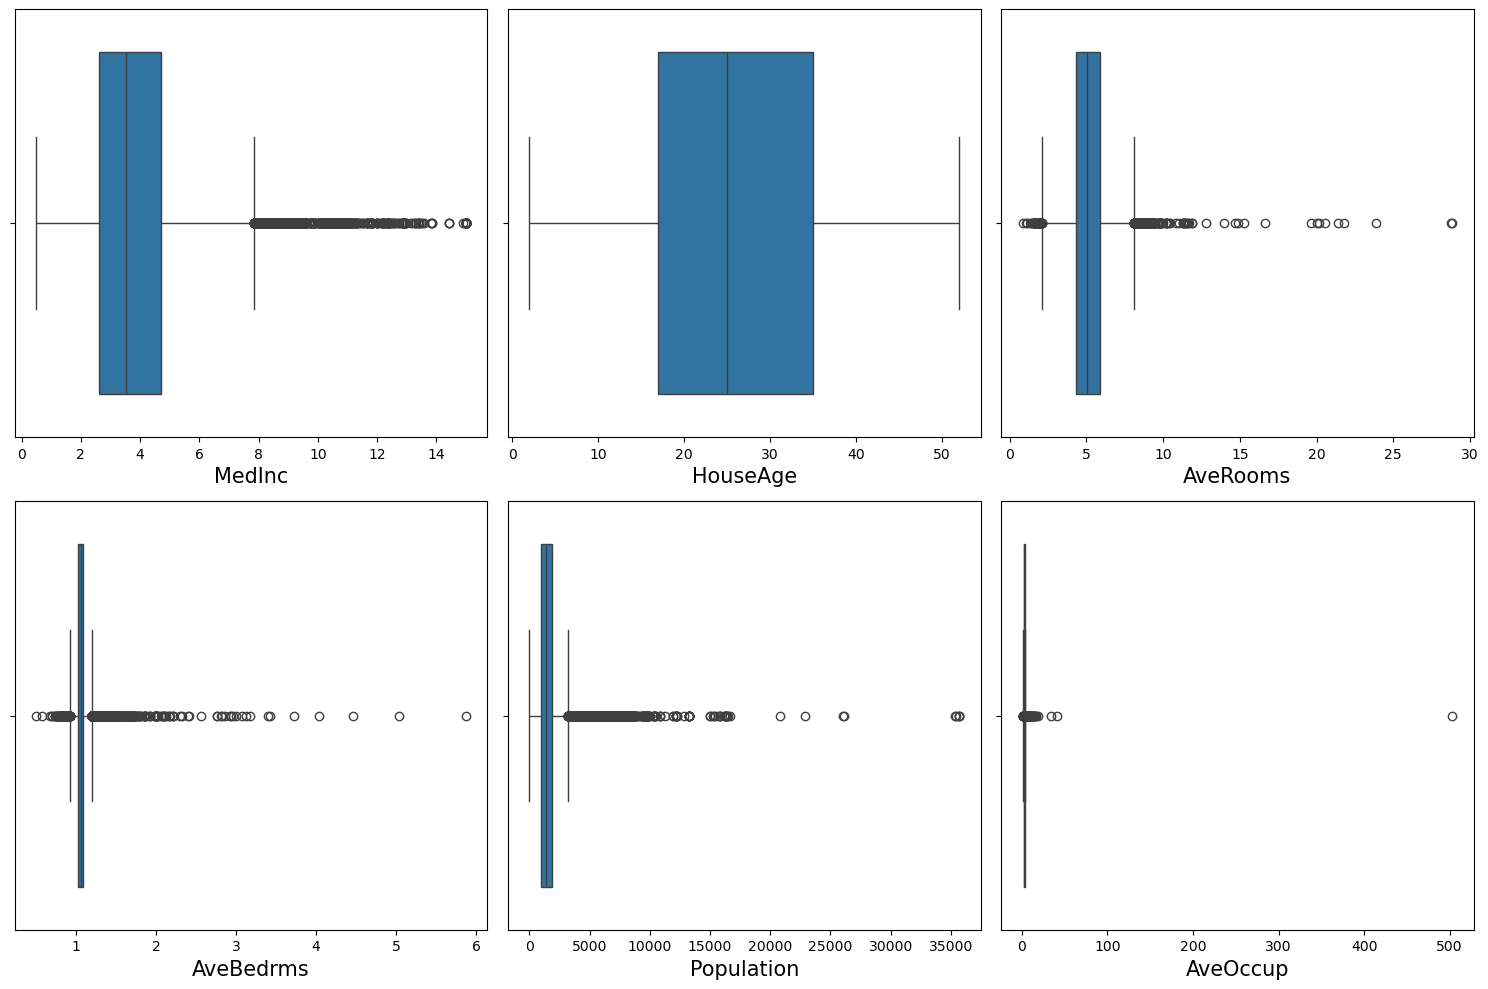

In [39]:
#4_2_1 - This is to visualize the distribution of numeric data through box plots.

import seaborn as sns
import matplotlib.pyplot as plt

# Filter the numeric columns from your DataFrame
df_num = df.select_dtypes(include=np.number)

# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the numeric columns and their corresponding subplots
for column, subplot in zip(df_num.columns, axes.flatten()):
    sns.boxplot(x=df[column], ax=subplot)
    subplot.set_xlabel(column, fontsize=15)

plt.tight_layout()
plt.show()

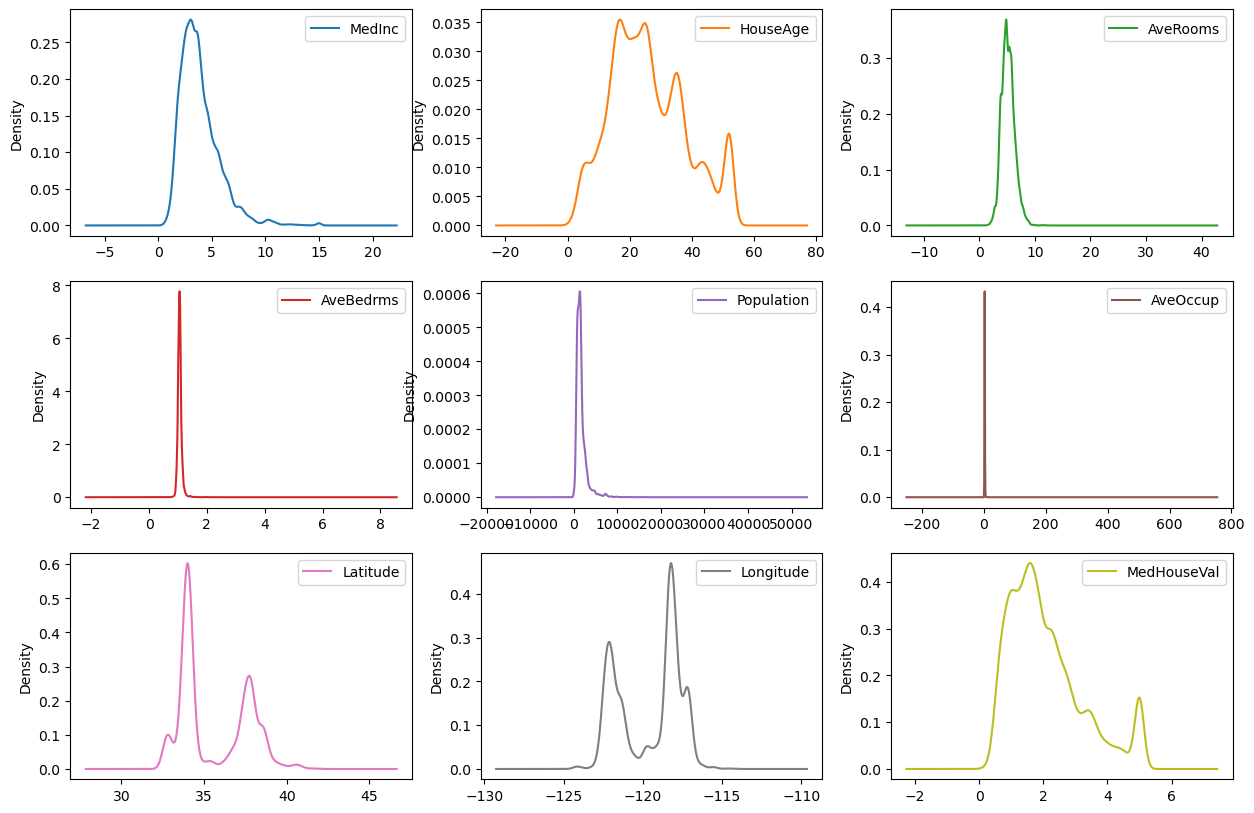

In [40]:
#4_2_2 - This is to visualize the distribution of variables in a DataFrame using density plots
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [41]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

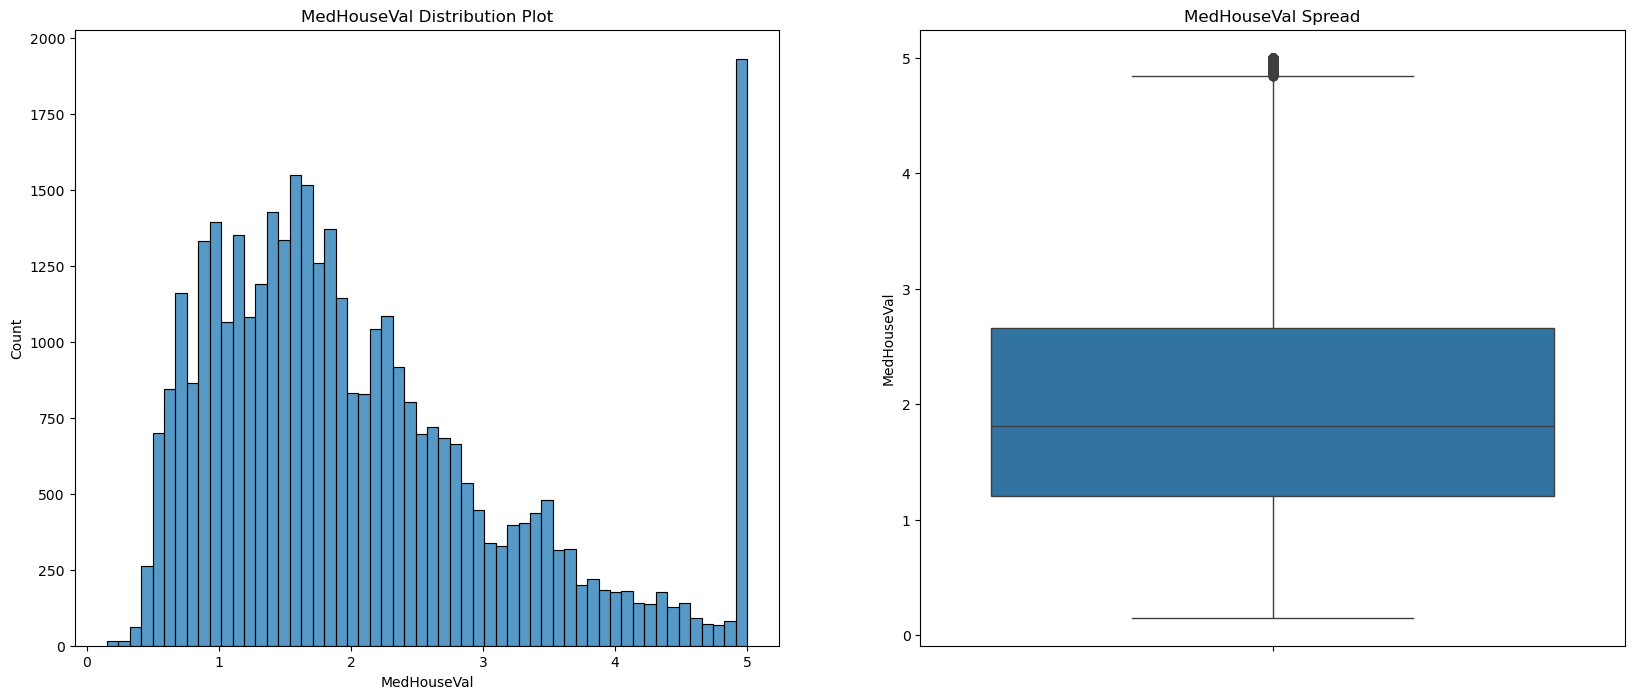

In [42]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('MedHouseVal Distribution Plot')
sns.histplot(df.MedHouseVal)

plt.subplot(1,2,2)
plt.title('MedHouseVal Spread')
sns.boxplot(y=df.MedHouseVal)

plt.show()

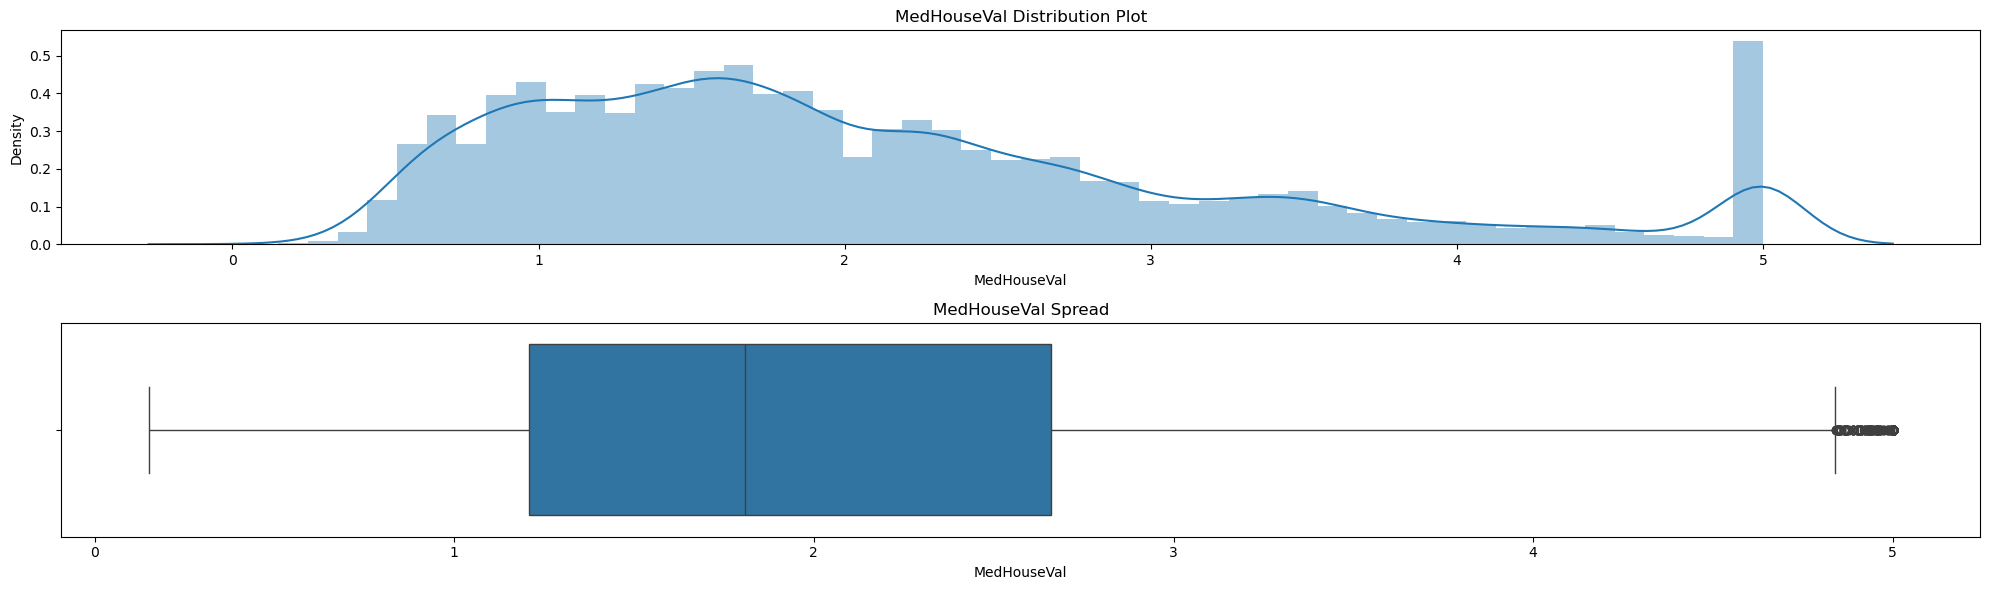

In [43]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('MedHouseVal Distribution Plot')
sns.distplot(df.MedHouseVal)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('MedHouseVal Spread')
sns.boxplot(x=df.MedHouseVal, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [44]:
df_num.MedHouseVal.mean(), df_num.MedHouseVal.median(), df_num.MedHouseVal.mode()

(2.079751250235614,
 1.808,
 0   5.000010
 Name: MedHouseVal, dtype: float64)

In [45]:
df_num.MedHouseVal.skew()

0.9708561212732252

In [46]:
df_num.MedHouseVal.kurtosis()

0.3085040343922998

In [47]:
df_num.MedHouseVal.describe()

count   37137.000000
mean        2.079751
std         1.158571
min         0.149990
25%         1.208000
50%         1.808000
75%         2.660000
max         5.000010
Name: MedHouseVal, dtype: float64

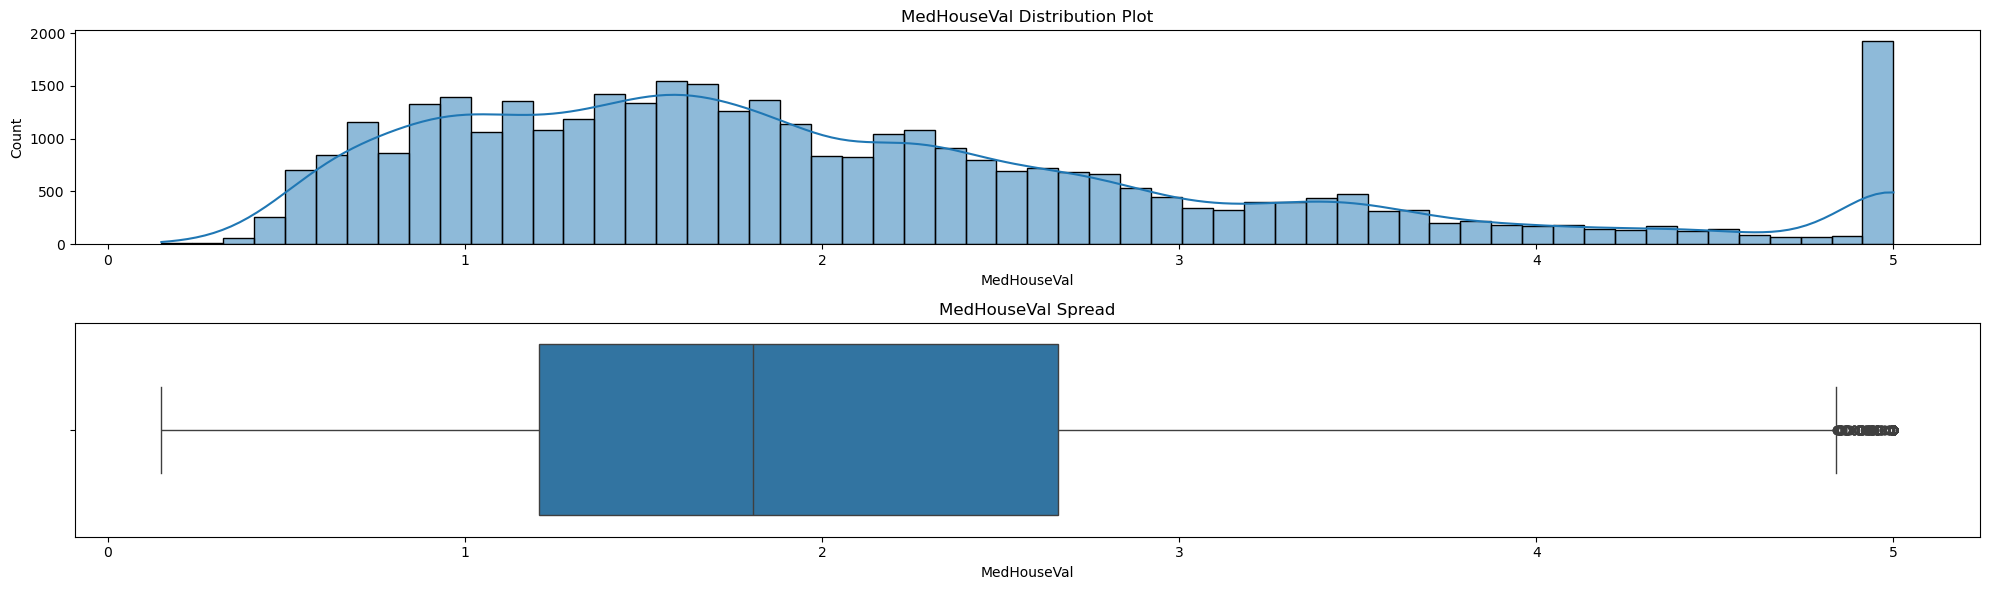

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('MedHouseVal Distribution Plot')
sns.histplot(df.MedHouseVal, kde=True)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('MedHouseVal Spread')
sns.boxplot(x=df.MedHouseVal, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [49]:
df_num.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

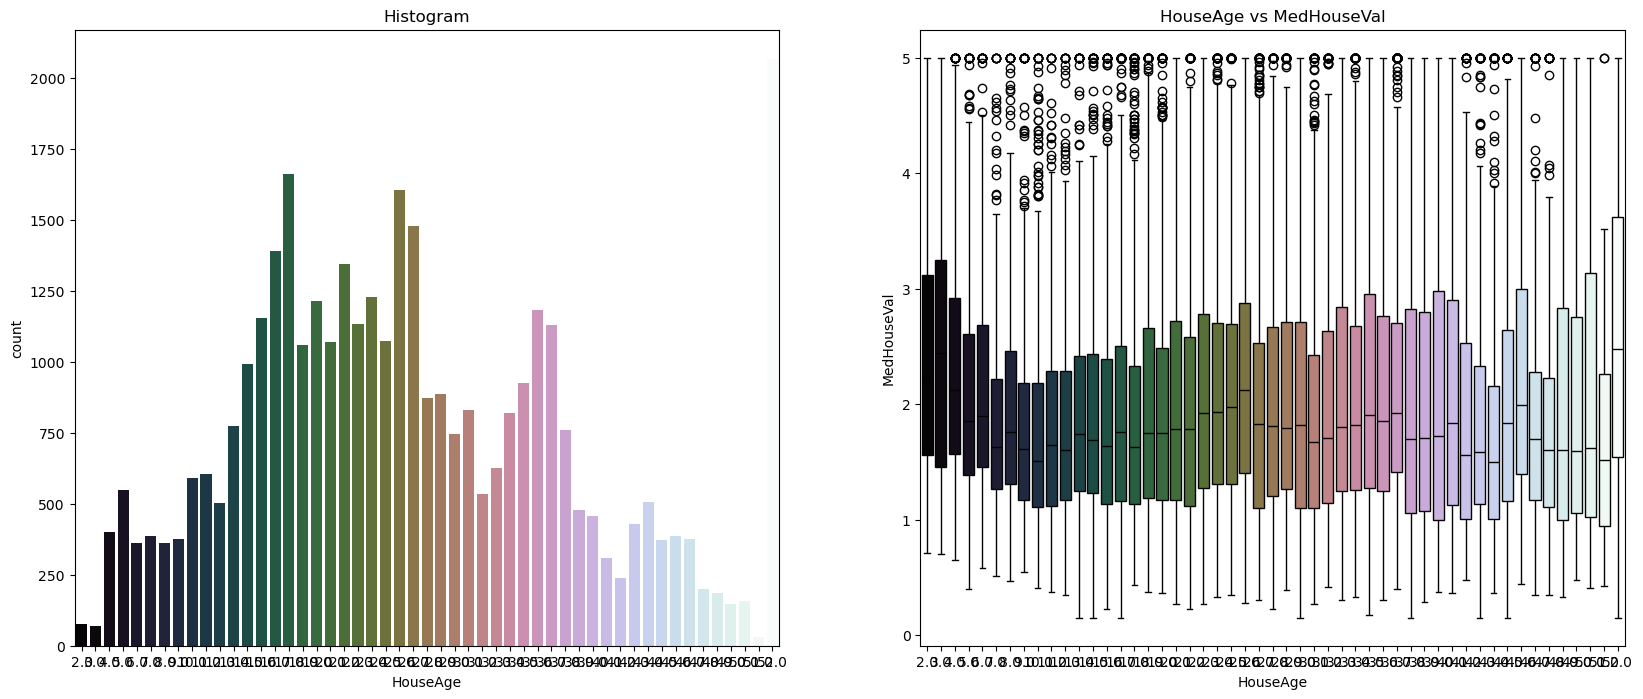

In [50]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogram')
sns.countplot(x='HouseAge', palette=("cubehelix"), data=df)

plt.subplot(1,2,2)
plt.title('HouseAge vs MedHouseVal')
sns.boxplot(data=df, x='HouseAge', y='MedHouseVal', palette=("cubehelix"))

plt.show()

In [51]:
df_num.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

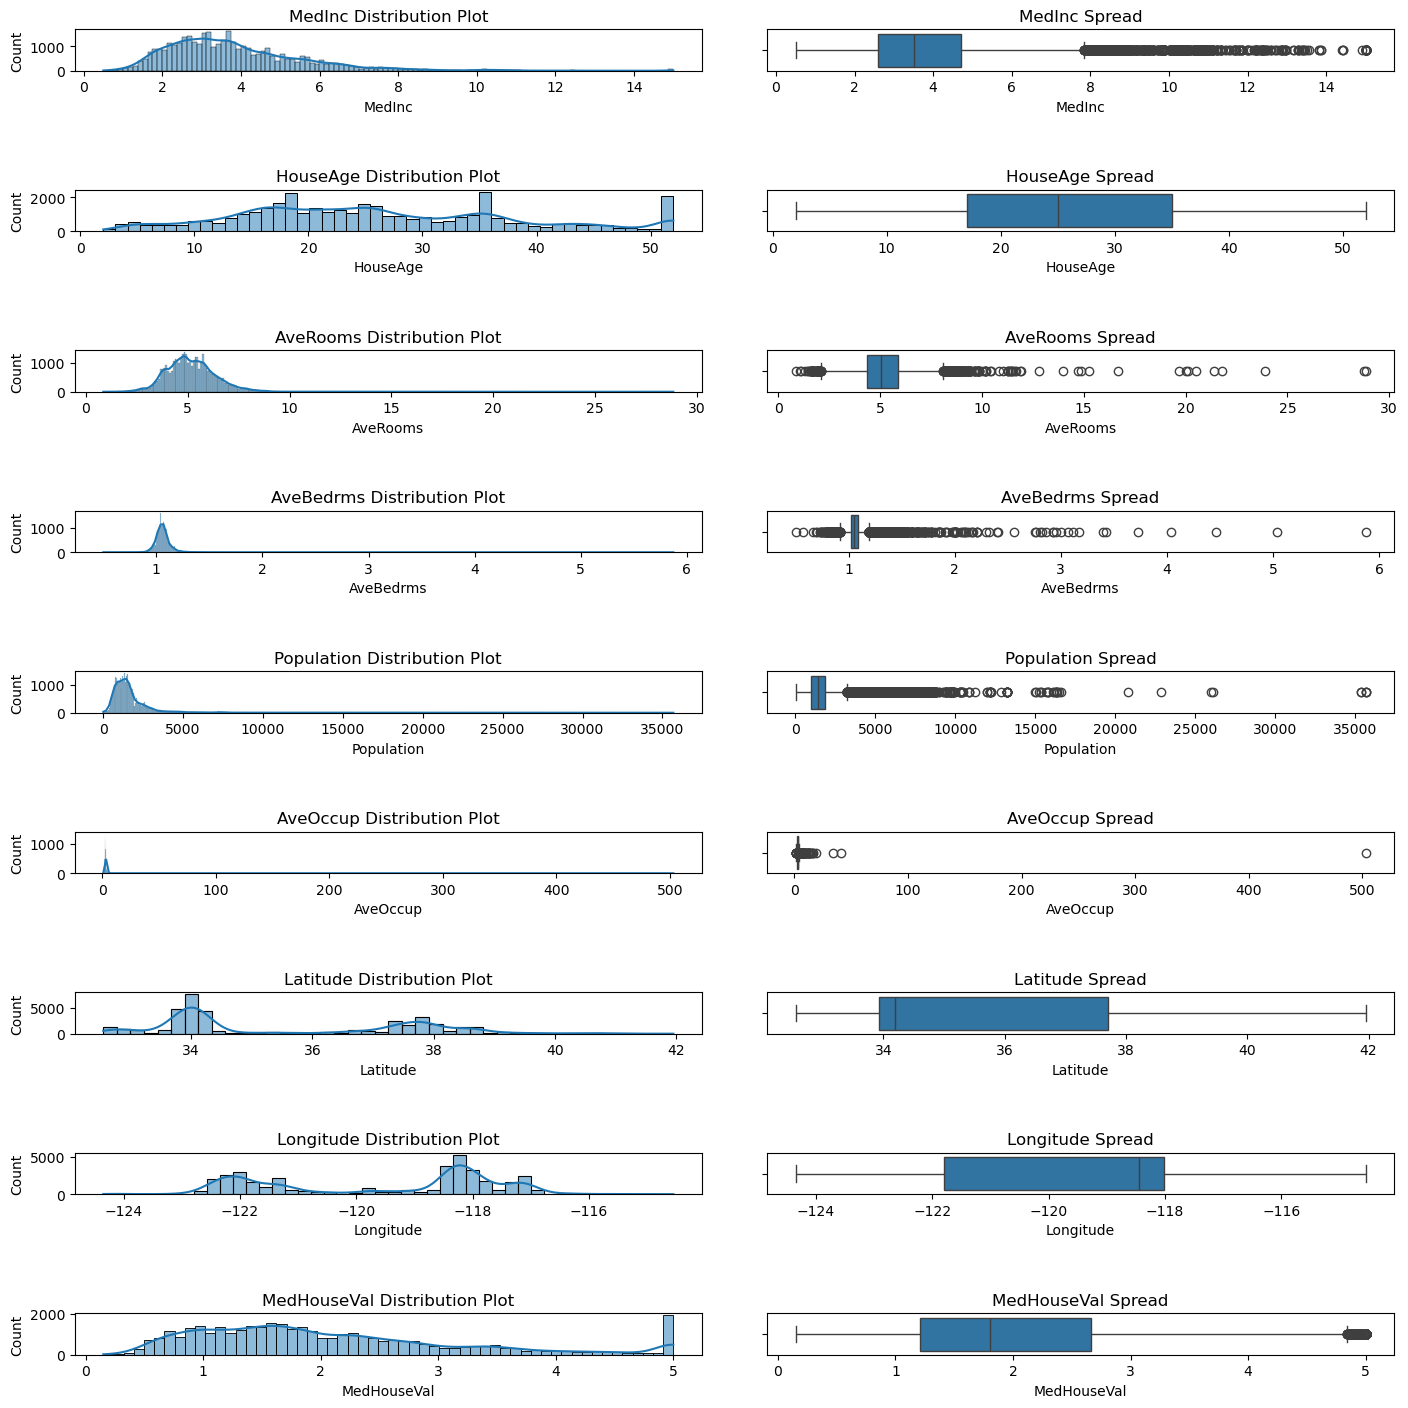

In [52]:
# Determine the number of rows and columns for subplots based on the number of numeric columns
n_rows = len(df_num.columns)
n_cols = 2  # Two plots per column (histogram and box plot)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate over the numeric columns and their corresponding subplots
for i, column in enumerate(df_num.columns):
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} Distribution Plot')
    
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'{column} Spread')

plt.tight_layout(pad=4.0)
plt.show()

In [53]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Get a list of categorical variables from the DataFrame
# categorical_variables = df_cat.columns[1:]

# # Calculate the number of rows and columns for subplots
# num_rows = 2
# num_cols = 3

# # Create a grid of subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# # Iterate over categorical variables and their corresponding subplots
# for variable, subplot in zip(categorical_variables, axes.flatten()):
#     sns.countplot(data=df, x=variable, ax=subplot)
#     subplot.set_xticklabels(subplot.get_xticklabels())
#     subplot.set_xlabel(variable, fontsize=15)

# plt.tight_layout(pad=4.0)
# plt.show()


In [54]:
# use skew() to calculate the skewness
skew = df.skew(numeric_only=True)

# print the skewness
print(skew)

MedInc          1.567604
HouseAge        0.413457
AveRooms        1.301106
AveBedrms      12.965449
Population      5.796582
AveOccup      170.890130
Latitude        0.439251
Longitude      -0.313242
MedHouseVal     0.970856
dtype: float64


In [55]:
# use kurt() to calculate the kurtosis
df.kurt(numeric_only=True)

MedInc            4.487282
HouseAge         -0.488224
AveRooms         14.711018
AveBedrms       407.644799
Population       87.059447
AveOccup      31599.813086
Latitude         -1.268805
Longitude        -1.452122
MedHouseVal       0.308504
dtype: float64

In [56]:
import matplotlib.pyplot as plt

<Figure size 1500x1000 with 0 Axes>

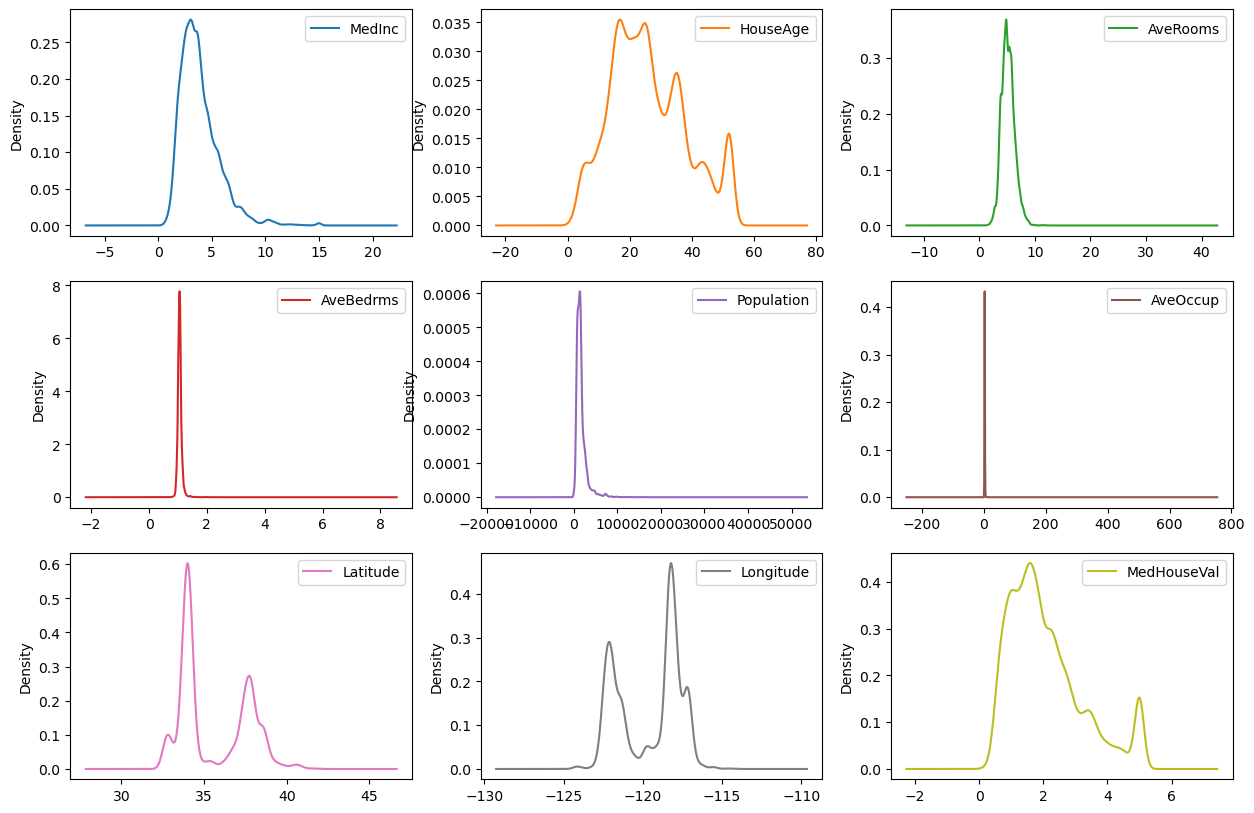

In [57]:
plt.figure(figsize=(15, 10))
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

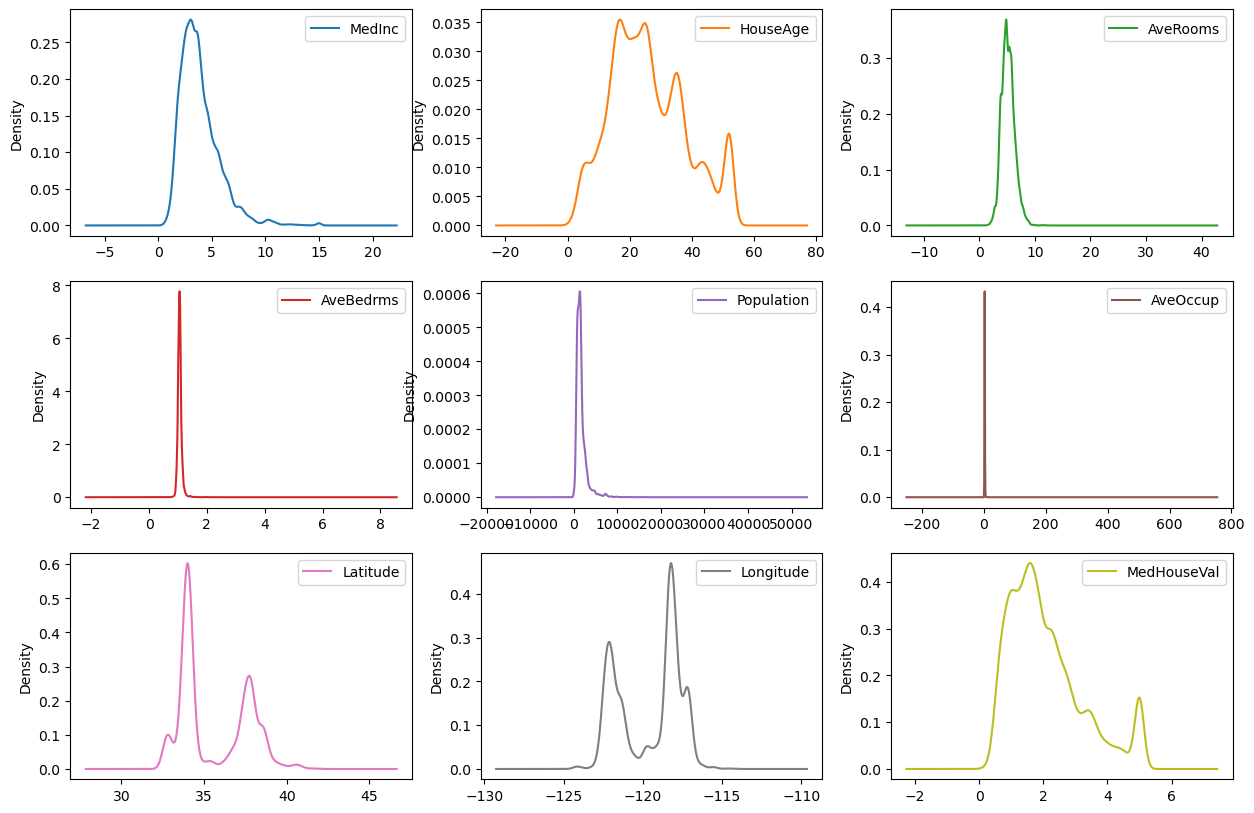

In [58]:
# set plot size
# plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [59]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

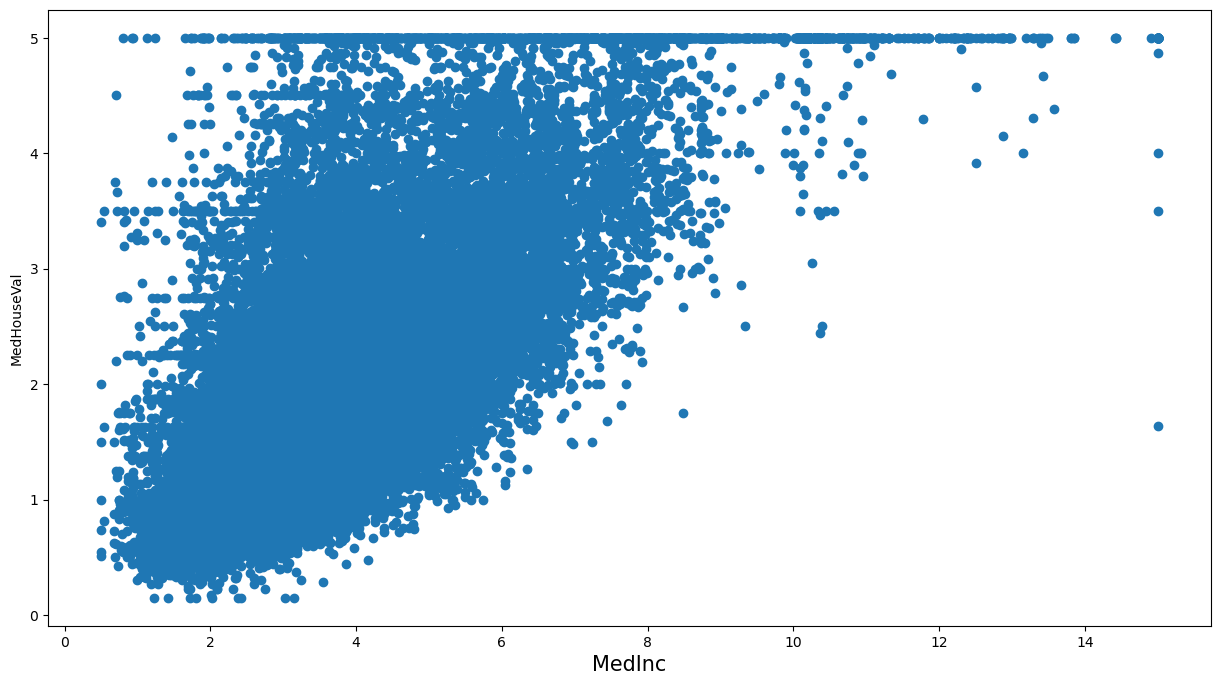

In [60]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["MedInc"], df["MedHouseVal"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("MedInc", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('MedHouseVal')
plt.show()

In [61]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

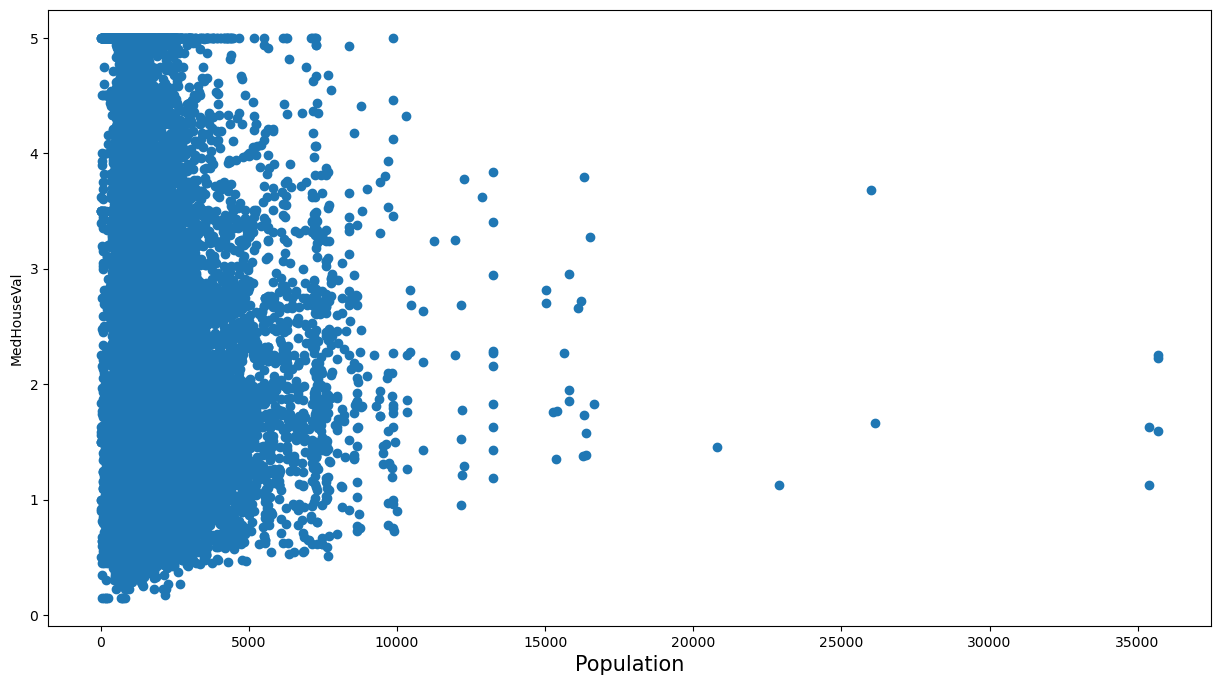

In [62]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["Population"], df["MedHouseVal"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("Population", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('MedHouseVal')
plt.show()

In [63]:
#Correlation

df_num.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.080542,0.699994,-0.127169,-0.008552,-0.000885,-0.060463,-0.043742,0.701925
HouseAge,-0.080542,1.000000,-0.156625,-0.056960,-0.235459,-0.002792,0.021071,-0.090394,0.103210
AveRooms,0.699994,-0.156625,1.000000,0.174753,-0.038099,0.023858,0.095169,-0.088184,0.366727
AveBedrms,-0.127169,-0.056960,0.174753,1.000000,-0.007120,-0.009257,0.026142,0.015218,-0.067487
Population,-0.008552,-0.235459,-0.038099,-0.007120,1.000000,0.022825,-0.069944,0.071085,-0.038479
AveOccup,-0.000885,-0.002792,0.023858,-0.009257,0.022825,1.000000,-0.032199,0.037118,-0.048475
Latitude,-0.060463,0.021071,0.095169,0.026142,-0.069944,-0.032199,1.000000,-0.937370,-0.116499
Longitude,-0.043742,-0.090394,-0.088184,0.015218,0.071085,0.037118,-0.937370,1.000000,-0.056742
MedHouseVal,0.701925,0.103210,0.366727,-0.067487,-0.038479,-0.048475,-0.116499,-0.056742,1.000000


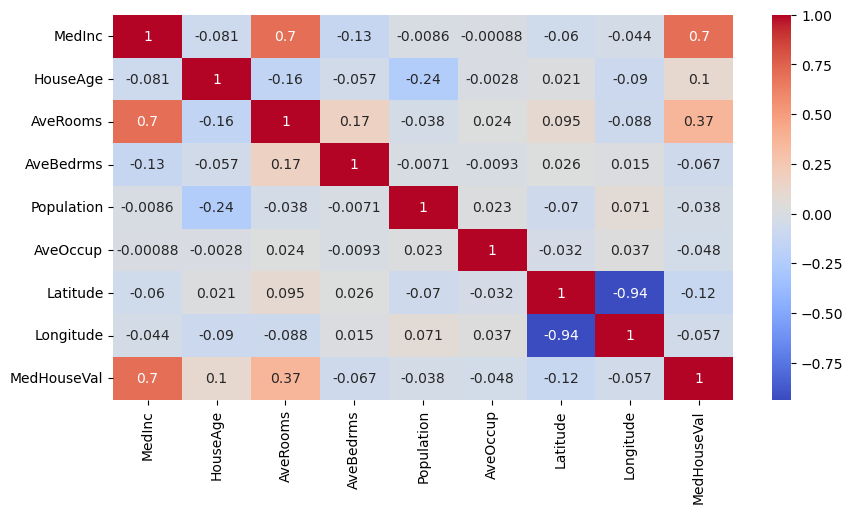

In [64]:
# Finding correlation among features using sns' heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_num.corr(),annot=True, cmap='coolwarm')
plt.show()

In [65]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [66]:
# removing features that are less correlated with our target variable
df_num.corr()[df_num.corr().MedHouseVal<=0.05]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
AveBedrms,-0.127169,-0.056960,0.174753,1.000000,-0.007120,-0.009257,0.026142,0.015218,-0.067487
Population,-0.008552,-0.235459,-0.038099,-0.007120,1.000000,0.022825,-0.069944,0.071085,-0.038479
AveOccup,-0.000885,-0.002792,0.023858,-0.009257,0.022825,1.000000,-0.032199,0.037118,-0.048475
Latitude,-0.060463,0.021071,0.095169,0.026142,-0.069944,-0.032199,1.000000,-0.937370,-0.116499
Longitude,-0.043742,-0.090394,-0.088184,0.015218,0.071085,0.037118,-0.937370,1.000000,-0.056742


In [67]:
# removing features that are less correlated with our target variable
df_num.corr().MedHouseVal[df_num.corr().MedHouseVal <= 0.05]


AveBedrms    -0.067487
Population   -0.038479
AveOccup     -0.048475
Latitude     -0.116499
Longitude    -0.056742
Name: MedHouseVal, dtype: float64

In [68]:
df_num.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [69]:
df_clean = df_num.drop(columns=['AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], axis=1)

In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       37137 non-null  float64
 1   HouseAge     37137 non-null  float64
 2   AveBedrms    37137 non-null  float64
 3   MedHouseVal  37137 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


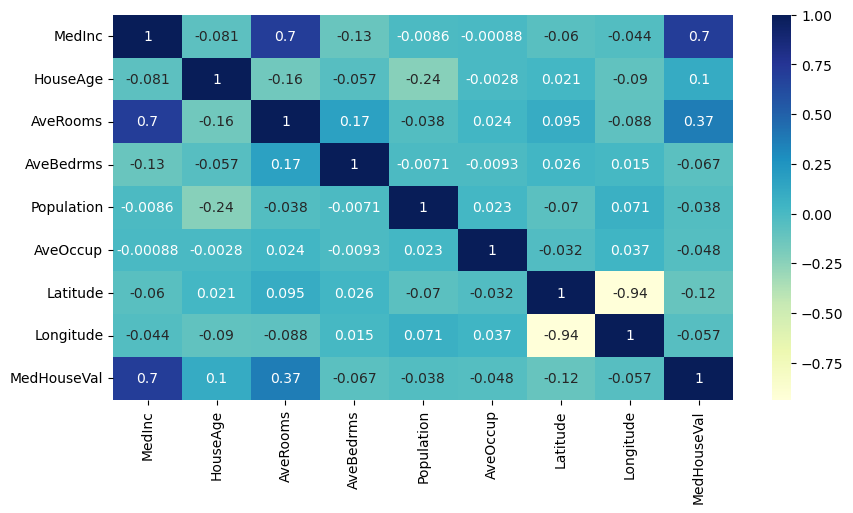

In [98]:
#Correlation using heatmap
plt.figure(figsize = (10, 5))
sns.heatmap(df_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

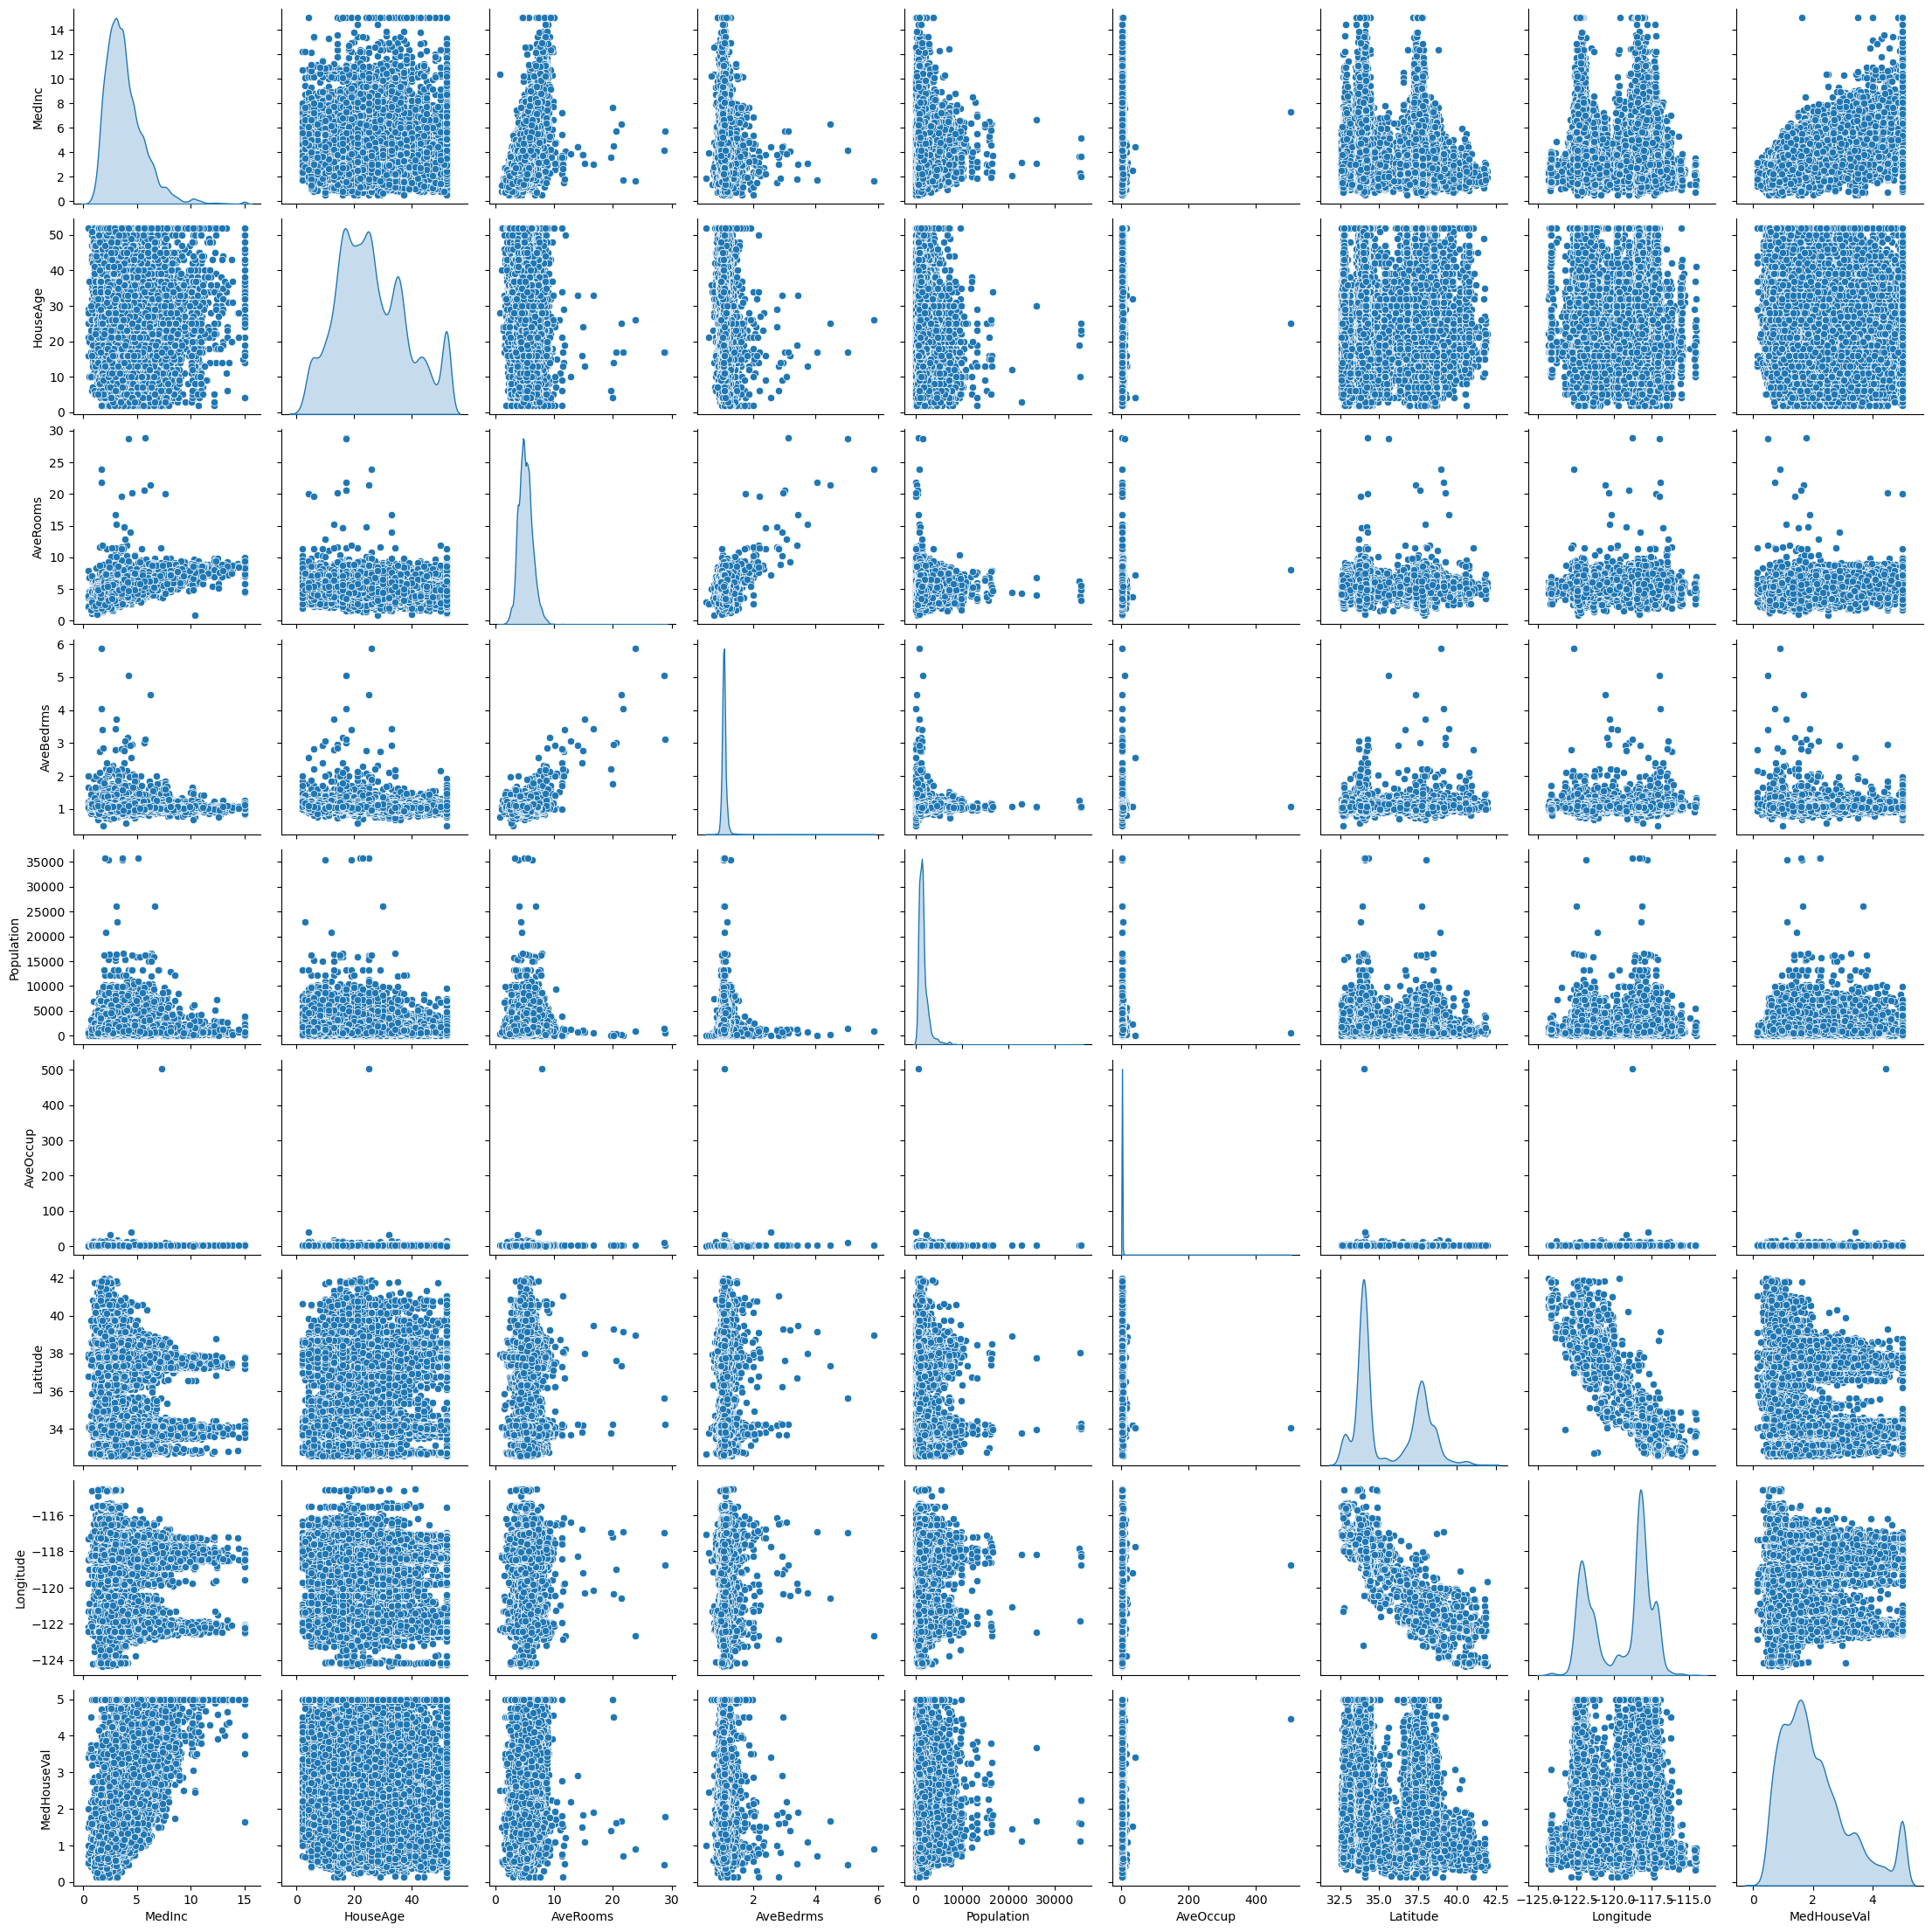

In [71]:
sns.pairplot(data=df_num, diag_kind='kde')
plt.show()

In [100]:
# Do type casting and impute missing values - mean/median and mode (categorical)

In [101]:
# skew - -0.5 to +0.5 - acceptance

In [72]:
df.skew(numeric_only=True)

MedInc          1.567604
HouseAge        0.413457
AveRooms        1.301106
AveBedrms      12.965449
Population      5.796582
AveOccup      170.890130
Latitude        0.439251
Longitude      -0.313242
MedHouseVal     0.970856
dtype: float64

In [103]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [104]:
df.MedHouseVal.describe()

count   37137.000000
mean        2.079751
std         1.158571
min         0.149990
25%         1.208000
50%         1.808000
75%         2.660000
max         5.000010
Name: MedHouseVal, dtype: float64

In [106]:
#df_cat.columns

In [107]:
df_num.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [73]:
# Assuming df is your DataFrame and columns_to_transform contains numerical columns
power_transformer = PowerTransformer()

In [74]:
pt = power_transformer.fit_transform(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal']])
pt

array([[-8.71782330e-01, -8.86747482e-01, -1.16584377e+00, ...,
        -3.36036764e-01, -3.60822483e-16, -1.07456978e+00],
       [ 1.44045199e-01, -6.90163138e-01,  7.60260425e-01, ...,
         1.37636950e+00, -8.88178420e-16, -1.13037164e+00],
       [ 7.17386134e-01,  1.76620773e-01,  1.14389654e+00, ...,
        -2.71292404e-01, -5.27355937e-16, -2.66044359e-01],
       ...,
       [ 4.08169767e-01,  1.88336025e+00, -3.42095433e-01, ...,
         1.08505702e+00, -1.47104551e-15,  1.16426197e+00],
       [-5.78897414e-01, -7.87208056e-01,  5.26288246e-01, ...,
         1.29145797e+00, -7.77156117e-16, -2.47876954e-01],
       [-1.01193613e+00,  7.04489925e-01,  2.97651208e-01, ...,
         5.47664216e-01, -1.11022302e-16, -1.67462278e+00]])

In [76]:
df_clean.columns

Index(['MedInc', 'HouseAge', 'AveBedrms', 'MedHouseVal'], dtype='object')

In [78]:
pt_clean = power_transformer.fit_transform(df_clean[['MedInc', 'HouseAge', 'AveBedrms', 'MedHouseVal']])

In [115]:
df_pt = pd.DataFrame(data=pt, columns=df_num.columns)
df_pt.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,-0.871782,-0.886747,-1.165844,0.813216,-0.143135,-0.396568,-0.336037,-0.000000,-1.074570
1,0.144045,-0.690163,0.760260,0.008365,0.122724,1.400786,1.376370,-0.000000,-1.130372
2,0.717386,0.176621,1.143897,0.698075,-0.447879,-0.436650,-0.271292,-0.000000,-0.266044
3,-0.845510,-0.787208,-1.682155,-1.541879,-0.175400,-1.180338,-1.735614,0.000000,-0.558120
4,0.163269,1.883360,-0.709685,0.231087,0.416701,-2.399759,1.101771,-0.000000,1.697561


In [79]:
df_pt_clean = pd.DataFrame(data=pt_clean, columns=df_clean.columns)

In [116]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.385900,15.000000,3.827160,1.112100,1280.000000,2.486989,34.600000,-120.120000,0.980000
1,3.718800,17.000000,6.013373,1.054217,1504.000000,3.813084,38.690000,-121.220000,0.946000
2,4.775000,27.000000,6.535604,1.103175,1061.000000,2.464602,34.710000,-120.450000,1.576000
3,2.413800,16.000000,3.350203,0.965432,1255.000000,2.089286,32.660000,-117.090000,1.336000
4,3.750000,52.000000,4.284404,1.069246,1793.000000,1.604790,37.800000,-122.410000,4.500000


In [117]:
df_pt.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,-0.871782,-0.886747,-1.165844,0.813216,-0.143135,-0.396568,-0.336037,-0.000000,-1.074570
1,0.144045,-0.690163,0.760260,0.008365,0.122724,1.400786,1.376370,-0.000000,-1.130372
2,0.717386,0.176621,1.143897,0.698075,-0.447879,-0.436650,-0.271292,-0.000000,-0.266044
3,-0.845510,-0.787208,-1.682155,-1.541879,-0.175400,-1.180338,-1.735614,0.000000,-0.558120
4,0.163269,1.883360,-0.709685,0.231087,0.416701,-2.399759,1.101771,-0.000000,1.697561


In [118]:
mean_values = df_pt.mean(axis=0)
std_dev_values = df_pt.std(axis=0)

print("Mean values:", mean_values)
print("Standard Deviation values:", std_dev_values)


Mean values: MedInc        -0.000000
HouseAge       0.000000
AveRooms       0.000000
AveBedrms      0.000000
Population     0.000000
AveOccup       0.000000
Latitude       0.000000
Longitude     -0.000000
MedHouseVal   -0.000000
dtype: float64
Standard Deviation values: MedInc        1.000013
HouseAge      1.000013
AveRooms      1.000013
AveBedrms     1.000013
Population    1.000013
AveOccup      1.000013
Latitude      1.000013
Longitude     0.000000
MedHouseVal   1.000013
dtype: float64


In [80]:
mean_values_clean = df_pt_clean.mean(axis=0)
std_dev_values_clean = df_pt_clean.std(axis=0)

print("Mean values:", mean_values_clean)
print("Standard Deviation values:", std_dev_values_clean)

Mean values: MedInc        -0.000000
HouseAge       0.000000
AveBedrms      0.000000
MedHouseVal   -0.000000
dtype: float64
Standard Deviation values: MedInc        1.000013
HouseAge      1.000013
AveBedrms     1.000013
MedHouseVal   1.000013
dtype: float64


<Figure size 1000x500 with 0 Axes>

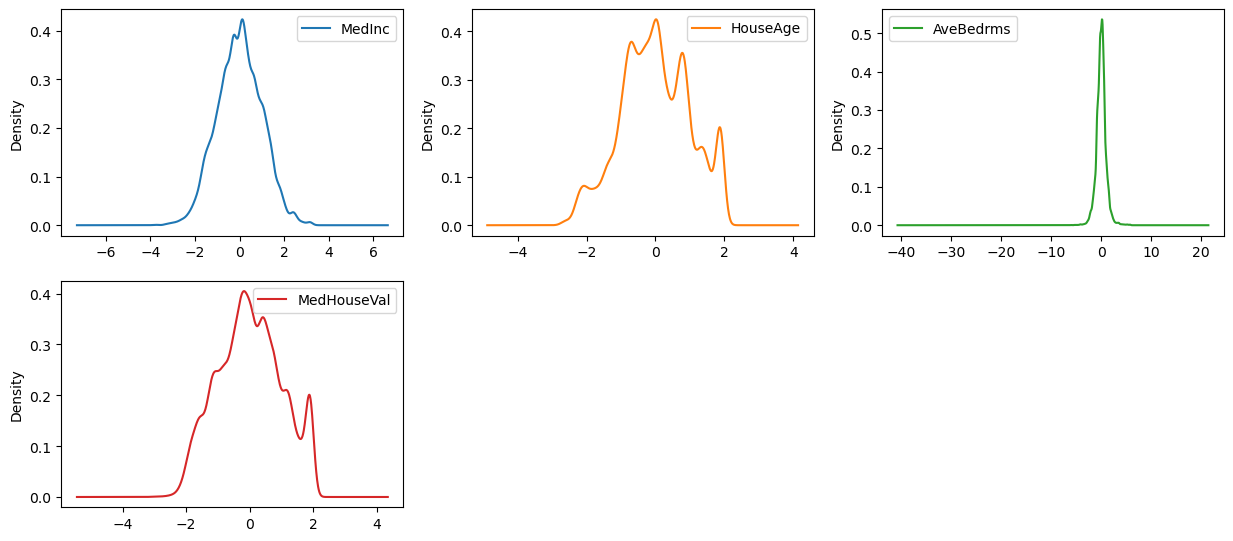

In [81]:
# set plot size
plt.figure(figsize=(10, 5))

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df_pt_clean.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

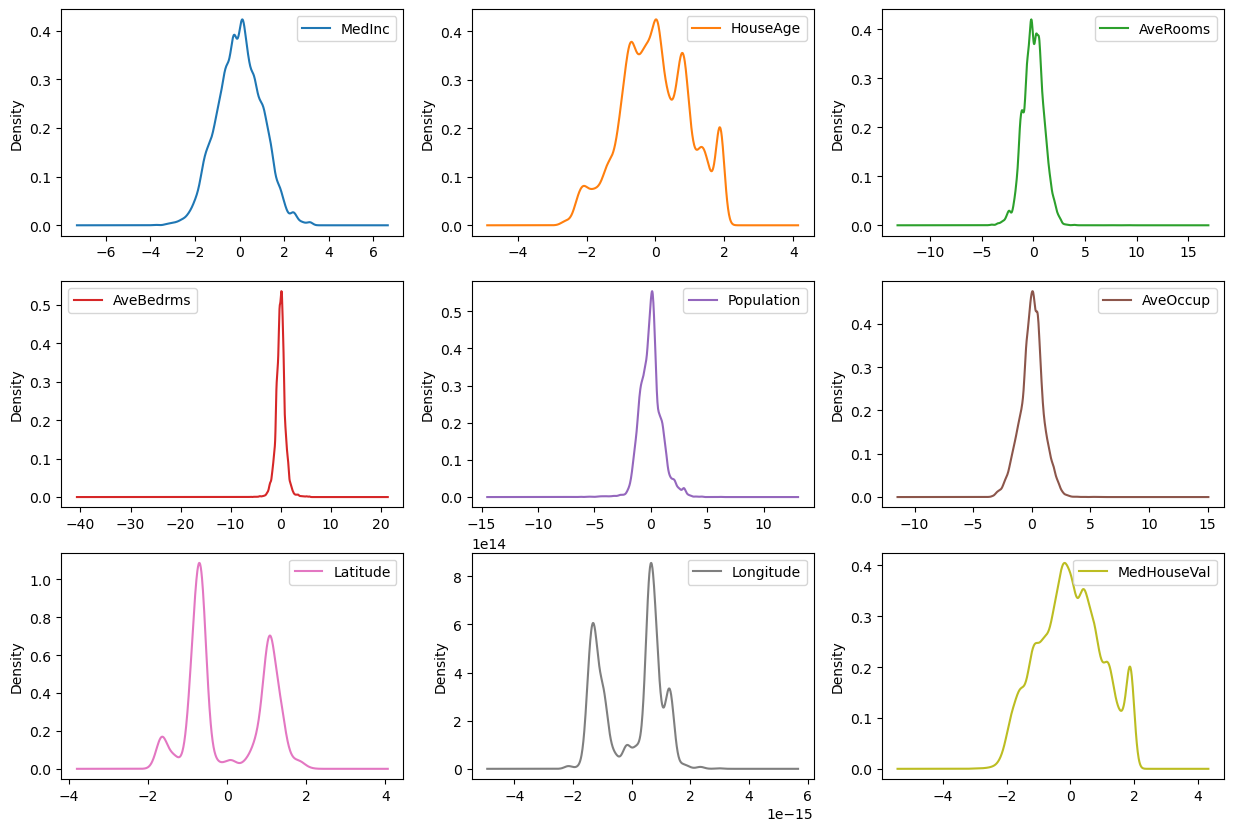

In [119]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df_pt.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

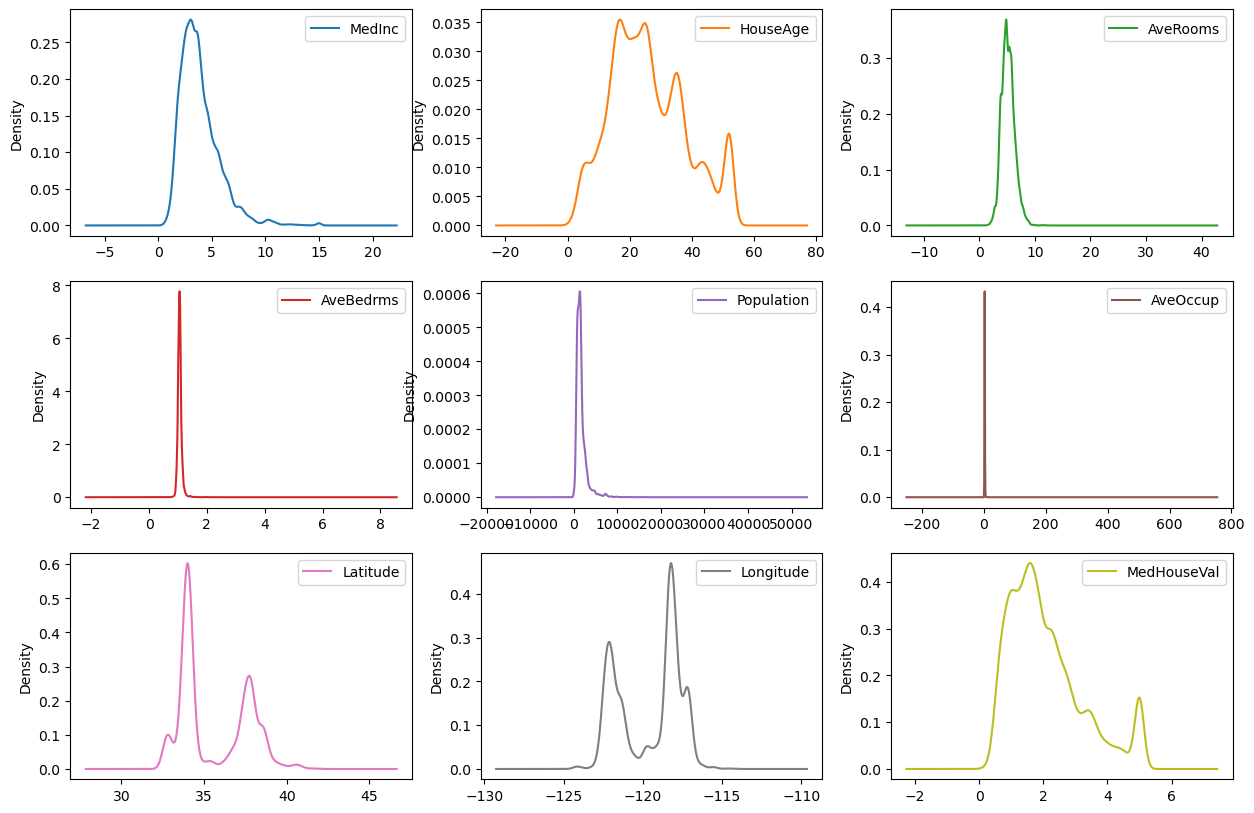

In [120]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [122]:
#df_cat.columns

In [123]:
#df_cat.head()

In [124]:
# df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
# df_cat_encoded.head(10)

In [125]:
#df_cat_encoded.columns

In [126]:
df_pt.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,-0.871782,-0.886747,-1.165844,0.813216,-0.143135,-0.396568,-0.336037,-0.000000,-1.074570
1,0.144045,-0.690163,0.760260,0.008365,0.122724,1.400786,1.376370,-0.000000,-1.130372
2,0.717386,0.176621,1.143897,0.698075,-0.447879,-0.436650,-0.271292,-0.000000,-0.266044
3,-0.845510,-0.787208,-1.682155,-1.541879,-0.175400,-1.180338,-1.735614,0.000000,-0.558120
4,0.163269,1.883360,-0.709685,0.231087,0.416701,-2.399759,1.101771,-0.000000,1.697561


In [127]:
# df_ready = pd.concat([df_pt, df_cat_encoded], axis=1)
# df_ready.head()

In [131]:
df_pt.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [147]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_pt.drop('MedHouseVal', axis = 1)

# dependent variable
y = df_pt['MedHouseVal']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (29709, 9)
y_train (29709,)
X_test (7428, 9)
y_test (7428,)


In [82]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_pt_clean.drop('MedHouseVal', axis = 1)

# dependent variable
y = df_pt_clean['MedHouseVal']

# # to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# # 'sm.add_constant' adds the intercept to the model
# X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (29709, 3)
y_train (29709,)
X_test (7428, 3)
y_test (7428,)


In [83]:
X_train.head()

,MedInc,HouseAge,AveBedrms
7714,0.004491,0.916563,0.213002
32447,-1.323415,-0.150818,0.395228
32451,-0.520907,0.096763,1.872875
23542,-1.077633,-0.412154,0.804772
9728,0.311689,0.558729,0.447906


In [149]:
import statsmodels
import statsmodels.api as sm

In [150]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     6540.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:44:22   Log-Likelihood:                -28320.
No. Observations:               29709   AIC:                         5.666e+04
Df Residuals:                   29701   BIC:                         5.672e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.004     -0.344      0.7

In [151]:
y_pred = MLR_model.predict(X_test)

In [152]:
y_pred = MLR_model.predict(X_test)

In [153]:
np.sum((y_pred - y_test)*(y_pred - y_test))/len(y_test)

0.4045326019244347

In [180]:
# Example: Read Titanic dataset
california_test_path = '../../../data/kaggle/playground_series/test.csv'
test = pd.read_csv(california_test_path)

In [181]:
test.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.706200,35.000000,4.966368,1.096539,1318.000000,2.844411,39.750000,-121.850000
1,37138,1.388200,22.000000,4.187035,1.098229,2296.000000,3.180218,33.950000,-118.290000
2,37139,7.719700,21.000000,7.129436,0.959276,1535.000000,2.888889,33.610000,-117.810000
3,37140,4.680600,49.000000,4.769697,1.048485,707.000000,1.743590,34.170000,-118.340000
4,37141,3.128400,25.000000,3.765306,1.081633,4716.000000,2.003827,34.170000,-118.290000


In [182]:
test_const = sm.add_constant(test.drop(columns='id', axis=1))

In [183]:
test_pred = MLR_model.predict(test_const)

In [185]:
california_submission_path = '../../../data/kaggle/playground_series/sample_submission.csv'
submission = pd.read_csv(california_submission_path)

In [188]:
submission.head()

,id,MedHouseVal
0,37137,2.079751
1,37138,2.079751
2,37139,2.079751
3,37140,2.079751
4,37141,2.079751


In [187]:
test.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.706200,35.000000,4.966368,1.096539,1318.000000,2.844411,39.750000,-121.850000
1,37138,1.388200,22.000000,4.187035,1.098229,2296.000000,3.180218,33.950000,-118.290000
2,37139,7.719700,21.000000,7.129436,0.959276,1535.000000,2.888889,33.610000,-117.810000
3,37140,4.680600,49.000000,4.769697,1.048485,707.000000,1.743590,34.170000,-118.340000
4,37141,3.128400,25.000000,3.765306,1.081633,4716.000000,2.003827,34.170000,-118.290000


In [189]:
submission_df = pd.DataFrame({'id':test.id, 'MedHouseVal': test_pred})

In [190]:
submission_df.to_csv('kaggle_submission_v1.csv', index=False)

In [194]:
#!kaggle competitions submit -c playground-series-s3e1 -f kaggle_submission_v1.csv -m "Message"

In [112]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [155]:
mse(y_test, y_pred)

0.4045326019244347

In [156]:
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
rmse

0.007379735839908695

In [157]:
np.sum(np.abs((y_pred - y_test)))/len(y_test)

0.49301731151123684

In [158]:
mae(y_test, y_pred)

0.49301731151123684

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [94]:
#!pip install xgboost
from xgboost import XGBRegressor

In [95]:
#!pip install lightgbm
from lightgbm import LGBMRegressor

In [96]:
#!pip install catboost
from catboost import CatBoostRegressor

In [97]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveBedrms'], dtype='object')

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [125]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [119]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred =lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(0.5490380092693491, 2.6142717594474063, 0.008126598138793012)

In [120]:
ridge = Ridge()
ridge_model = ridge.fit(X_train, y_train)
y_pred =ridge_model.predict(X_test)
mae_error = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae_error, mape, rmse

(0.5490391081085303, 2.614201211631567, 0.008126593896147142)

In [121]:
lasso = Lasso()
lasso_model = lasso.fit(X_train, y_train)
y_pred =lasso_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(0.8152652946310249, 1.002150265567335, 0.01157380868624463)

In [122]:
elastic_net =ElasticNet()
elastic_net_model=elastic_net.fit(X_train, y_train)
y_pred =elastic_net_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(0.7415299877289577, 1.2398521779258855, 0.010528597632178232)

In [123]:
knr = KNeighborsRegressor()
knr_model = knr.fit(X_train, y_train)
y_pred = knr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(0.5789645735418626, 3.1523254036417305, 0.008643314376837038)

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.gaussian_process import GaussianProcessRegressor

In [127]:
gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(0.5311832291569045, 2.4803345812262654, 0.007887295299793947)

In [128]:
etr = ExtraTreeRegressor()
etr_model = etr.fit(X_train, y_train)
y_pred = etr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(0.7421722094376437, 4.2279560219011305, 0.011181143782653105)

In [131]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(0.7405758368743978, 4.8185280517031295, 0.011102722803711561)

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.gaussian_process import GaussianProcessRegressor

In [133]:
svr = SVR()
svr_model = svr.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(0.5297290216273852, 2.4931530430124815, 0.007963948744082648)

In [134]:
rf = RandomForestRegressor()
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(0.5553956889523212, 2.920936352577602, 0.008288340479507734)

In [135]:
abr = AdaBoostRegressor()
abr_model = abr.fit(X_train, y_train)
y_pred = abr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(0.579051310522288, 2.202289466308174, 0.008399618172167196)

In [136]:
gpr = GaussianProcessRegressor()
gpr_model = gpr.fit(X_train, y_train)
y_pred = gpr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(3.7145793324809753, 8.54125063556064, 0.7850433637297433)

In [137]:
#!pip install xgboost
from xgboost import XGBRegressor

In [138]:
xgb = XGBRegressor()
xgb_model = xgb.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

(0.5393820762846678, 2.592034920992168, 0.008033478870798751)

In [ ]:
#!pip install lightgbm
from lightgbm import LGBMRegressor

In [139]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
mae, mape, rmse

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 29709, number of used features: 3
[LightGBM] [Info] Start training from score -0.001715


(0.5288114579310574, 2.454524934250863, 0.007869315983808824)

In [ ]:
#!pip install catboost
from catboost import CatBoostRegressor

In [141]:
# cb = CatBoostRegressor()
# cb_model = cb.fit(X_train, y_train)
# y_pred = cb_model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mape = mean_absolute_percentage_error(y_test, y_pred)
# rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
# mae, mape, rmse

In [1]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape